# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: **9**

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
   \nabla_{w} Q(w) = \dfrac{2}{\ell} \left(X^TXw - X^Ty\right) = \dfrac{2}{\ell} X^T\left(Xw - y\right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафиксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:  
https://contest.yandex.ru/contest/70588/run-report/125606642/

* **StochasticDescent**:  
https://contest.yandex.ru/contest/70588/run-report/125606727/

* **MomentumDescent**:  
https://contest.yandex.ru/contest/70588/run-report/125606756/

* **Adam**:  
https://contest.yandex.ru/contest/70588/run-report/125606797/

* **LinearRegression**:  
https://contest.yandex.ru/contest/70588/run-report/125606873/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

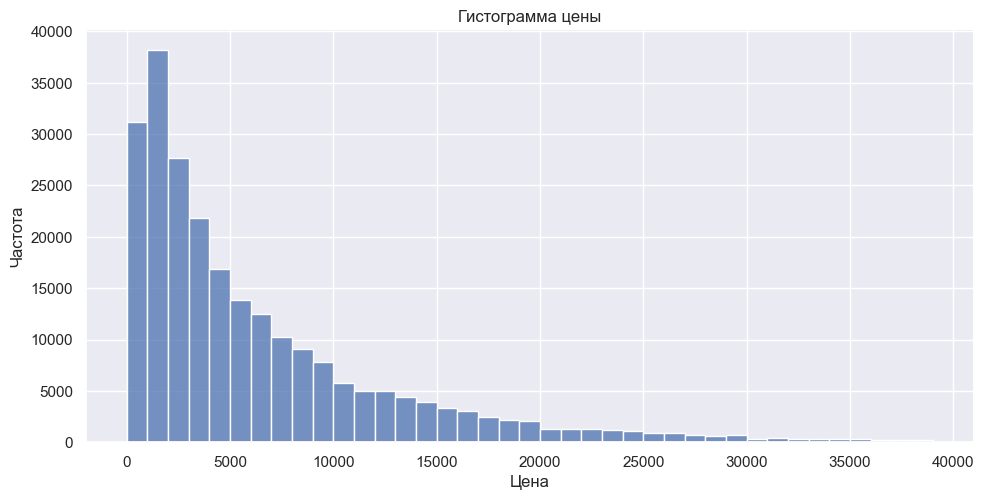

In [9]:
sns.displot(data["price"], bins=range(0, 40000, 1000), aspect=2, kde=False)
plt.title('Гистограмма цены')
plt.xlabel('Цена')
plt.ylabel('Частота');

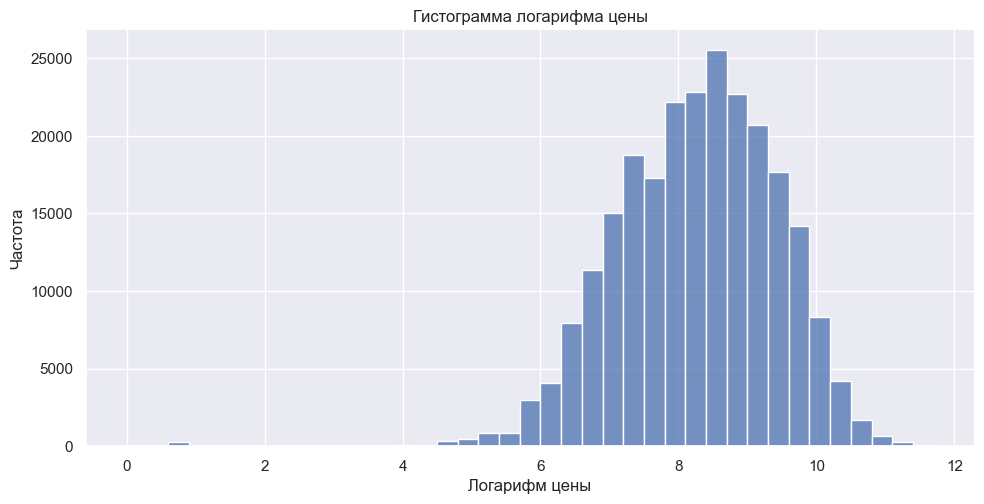

In [10]:
sns.displot(np.log1p(data["price"]), bins=np.arange(0, 12, 0.3), aspect=2, kde=False)
plt.title('Гистограмма логарифма цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота');

Распределение логарифма цены более приближено к нормальному, поэтому есть смысл взять именно его в качестве таргета

In [11]:
data["log_price"] = np.log1p(data["price"])

In [12]:
data["price"].min(), data["price"].max()

(1, 99999)

Выбросы есть. Отсечем значения до 2 и после 98 квантилей:

In [13]:
data = data[(data["price"] > data["price"].quantile(0.02)) & (data["price"] < data["price"].quantile(0.98))]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231509 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              231509 non-null  object 
 1   model              231509 non-null  object 
 2   vehicleType        231509 non-null  object 
 3   gearbox            231509 non-null  object 
 4   fuelType           231509 non-null  object 
 5   notRepairedDamage  231509 non-null  object 
 6   powerPS            231509 non-null  int64  
 7   kilometer          231509 non-null  int64  
 8   autoAgeMonths      231509 non-null  int64  
 9   price              231509 non-null  int64  
 10  log_price          231509 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 21.2+ MB


In [15]:
data.drop(columns=["price"], inplace=True)

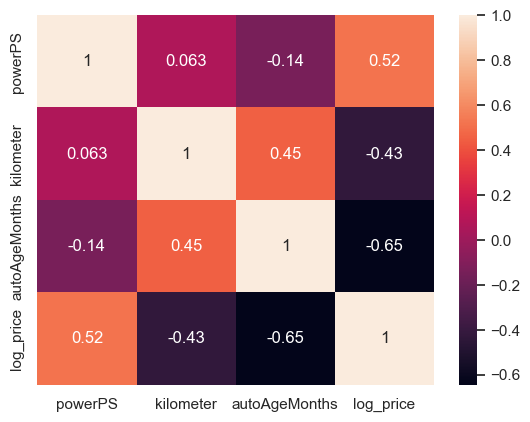

In [16]:
sns.heatmap(data.select_dtypes(["int64", "float64"]).corr(), annot=data.select_dtypes(["int64", "float64"]).corr());

Сильнее всего по модулю таргет скоррелирован с возрастом автомобиля. Все числовые признаки достаточно сильно влияют на целевую переменную

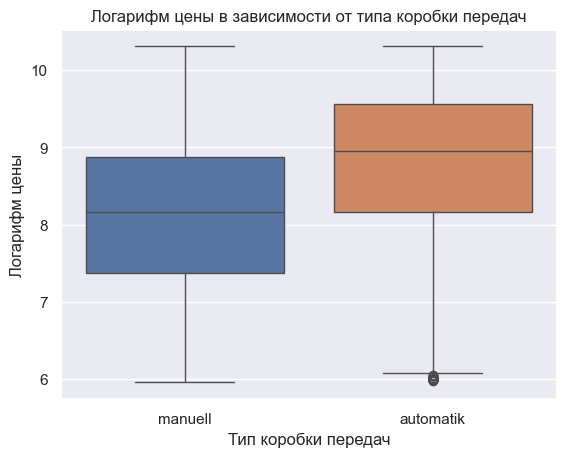

In [17]:
sns.boxplot(x="gearbox", y="log_price", data=data, hue="gearbox", legend=False)
plt.title('Логарифм цены в зависимости от типа коробки передач')
plt.xlabel('Тип коробки передач')
plt.ylabel('Логарифм цены');

Машины с автоматической коробкой передач стоят в среднем дороже, чем с механической

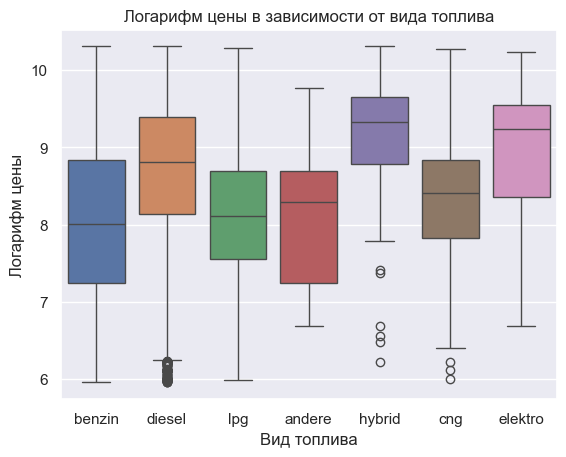

In [18]:
sns.boxplot(x="fuelType", y="log_price", data=data, hue="fuelType", legend=False)
plt.title('Логарифм цены в зависимости от вида топлива')
plt.xlabel('Вид топлива')
plt.ylabel('Логарифм цены');

Электрические и гибридные автомобили самые дорогие, бензиновые - самые дешевые

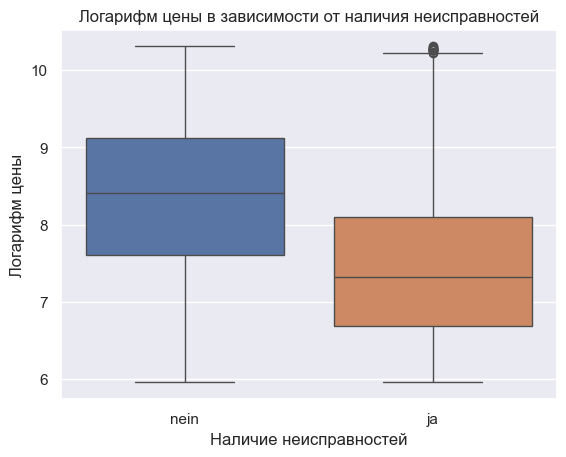

In [19]:
sns.boxplot(x="notRepairedDamage", y="log_price", data=data, hue="notRepairedDamage", legend=False)
plt.title('Логарифм цены в зависимости от наличия неисправностей')
plt.xlabel('Наличие неисправностей')
plt.ylabel('Логарифм цены');

Действительно - целые автомобили в среднем стоят дороже поврежденных

In [20]:
categorical = data.select_dtypes("object").columns.tolist()
numeric = data.select_dtypes("int64").columns.tolist()
other = []

In [21]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data["log_price"]

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test_val, y_train, y_test_val = train_test_split(data.drop(columns=["log_price"]), data["log_price"], test_size=0.2, random_state=17)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=17)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [25]:
X_train = column_transformer.fit_transform(X_train).toarray()
X_val = column_transformer.transform(X_val).toarray()
X_test = column_transformer.transform(X_test).toarray()

y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [26]:
from sklearn.metrics import r2_score
import time
from tqdm.notebook import tqdm

In [28]:
results = {}
lambdas = np.logspace(-3, 0.5, 5)

for gd_type in ['full', 'stochastic', 'momentum', 'adam']:
    best_lambda = 0
    best_model = None
    val_loss_min = float("inf")
    for l in tqdm(lambdas):
        descent_config = {'descent_name': gd_type, 'kwargs': {'lambda_': l, 'dimension': X_train.shape[1]}}

        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        val_loss_new = model.calc_loss(X_val, y_val)
        if val_loss_new < val_loss_min:
            val_loss_min = val_loss_new
            best_lambda = l
            best_model = model

    train_loss = best_model.calc_loss(X_train, y_train)
    test_loss = best_model.calc_loss(X_test, y_test)
    r2 = r2_score(best_model.predict(X_test), y_test)
    results[gd_type] = best_model.loss_history

    print(gd_type)
    print(f"\tBest lambda:\t{best_lambda}")
    print(f"\tTrain loss:\t{train_loss}")
    print(f"\tTest loss:\t{test_loss}")
    print(f"\tR2 score:\t{r2}")


  0%|          | 0/5 [00:00<?, ?it/s]

full
	Best lambda:	0.4216965034285822
	Train loss:	0.37405629502639
	Test loss:	0.37445683881787106
	R2 score:	0.578705023748529


  0%|          | 0/5 [00:00<?, ?it/s]

stochastic
	Best lambda:	0.4216965034285822
	Train loss:	0.3195962636232753
	Test loss:	0.3187576401550523
	R2 score:	0.6170576210287664


  0%|          | 0/5 [00:00<?, ?it/s]

momentum
	Best lambda:	0.4216965034285822
	Train loss:	0.261413567064048
	Test loss:	0.2618231399020195
	R2 score:	0.6702620192000328


  0%|          | 0/5 [00:00<?, ?it/s]

adam
	Best lambda:	3.1622776601683795
	Train loss:	0.22427599106465188
	Test loss:	0.2247981941221471
	R2 score:	0.7247789137597028


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

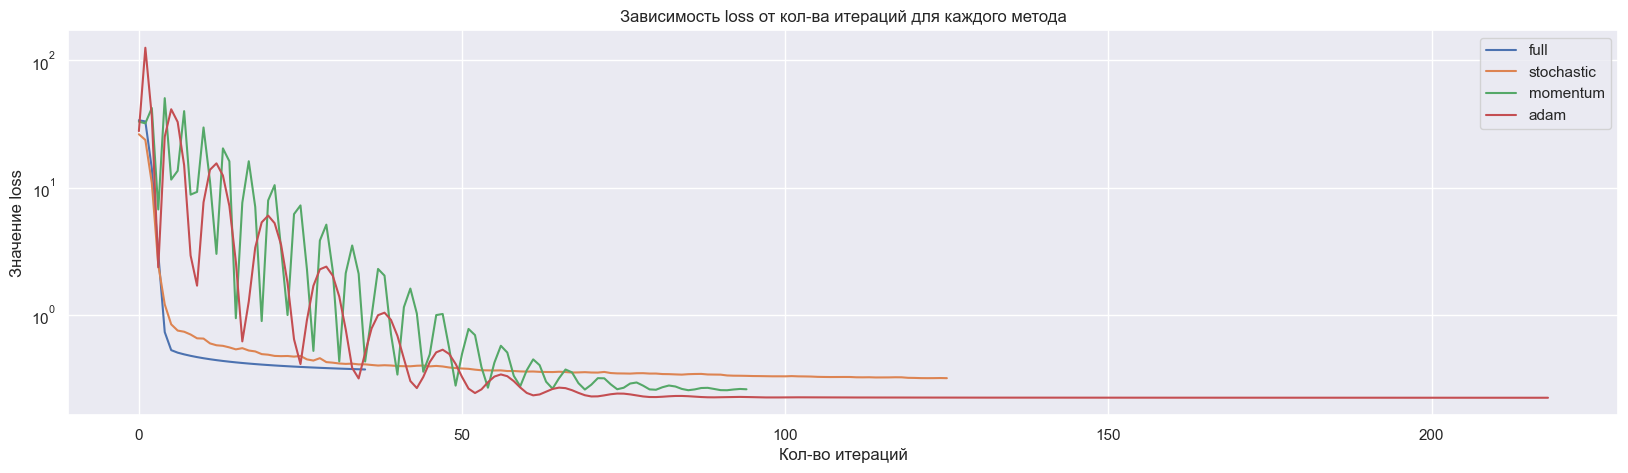

In [29]:
plt.figure(figsize=(20, 5))
for gd, loss_history in results.items():
    plt.plot(loss_history, label=gd)
plt.title('Зависимость loss от кол-ва итераций для каждого метода')
plt.xlabel('Кол-во итераций')
plt.ylabel('Значение loss')
plt.yscale('log')
plt.legend()
plt.show()

- Полный градиентный спуск сошелся за самое минимальное число итераций. Моментуму потребовалось практически в 2 раза больше итераций, SGD - в 3.5 раза больше.
- Наилучшее качество метрики и лосса удалось получить при использовании adam, наихудшее - при использовании полного градиентного спуска
- У momentum и adam очень сильные осцилляции (удивительно, что их почти нет у SGD)
- При этом у adam меньше колебаний, чем у momentum, что довольно логично

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
batch_sizes = np.arange(5, 500, 10)

batch_info = {}
best_lambda = 0.4217
for b in batch_sizes:
    times = []
    iters = []
    for _ in range(10):
        start_time = time.time()
        descent_config = {'descent_name': 'stochastic', 'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambda, 'batch_size': b}}
        sgd = LinearRegression(descent_config=descent_config)
        sgd.fit(X_train, y_train)
        times.append(time.time() - start_time)
        iters.append(len(sgd.loss_history))

    batch_info[b] = {"time": np.mean(times), "n_iter": np.mean(iters)}


In [ ]:
mean_time = []
mean_iter = []
batches = []
for b, v in batch_info.items():
    batches.append(b)
    mean_time.append(v['time'])
    mean_iter.append(v['n_iter'])

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(batches, mean_time)
plt.title('Зависимость среднего кол-ва времени от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее кол-во времени (сек)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(batches, mean_iter)
plt.title('Зависимость среднего кол-ва итераций от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее кол-во итераций')
plt.show()

Видим, что чем больше размер батча, тем меньше итераций и времени нам требуется для сходимости

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:  
https://contest.yandex.ru/contest/70588/run-report/125807672/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
results_reg = {}
lambdas = np.logspace(-3, 0.5, 5)
mus = np.logspace(-3, 0.5, 5)

for gd_type in ['full', 'stochastic', 'momentum', 'adam']:
    best_lambda = 0
    best_mu = 0
    best_model = None
    val_loss_min = float("inf")
    for l in tqdm(lambdas):
        for mu in tqdm(mus):
            descent_config = {'descent_name': gd_type, 'regularized': True,
                              'kwargs': {'dimension': X_train.shape[1], 'lambda_': l, 'mu': mu}}
            model = LinearRegression(descent_config=descent_config)
            model.fit(X_train, y_train)
            
            val_loss_new = model.calc_loss(X_val, y_val)
            if val_loss_new < val_loss_min:
                val_loss_min = val_loss_new
                best_lambda = l
                best_mu = mu
                best_model = model

    train_loss = best_model.calc_loss(X_train, y_train)
    test_loss = best_model.calc_loss(X_test, y_test)
    r2 = r2_score(best_model.predict(X_test), y_test)
    results_reg[gd_type] = best_model.loss_history

    print(gd_type)
    print(f"\tBest lambda:\t{best_lambda}")
    print(f"\tBest mu:\t{best_mu}")
    print(f"\tTrain loss:\t{train_loss}")
    print(f"\tTest loss:\t{test_loss}")
    print(f"\tR2 score:\t{r2}")

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

for gd_type in ['full', 'stochastic', 'momentum', 'adam']:
    if gd_type == 'full':
        row, col = (0, 0)
    elif gd_type == 'stochastic':
        row, col = (0, 1)
    elif gd_type == 'momentum':
        row, col = (1, 0)
    else:
        row, col = (1, 1)

    axes[row, col].plot(results_reg[gd_type], label='with reg')
    axes[row, col].plot(results[gd_type], label='without reg')
    axes[row, col].set_title(gd_type)
    axes[row, col].set_xlabel('Кол-во итераций')
    axes[row, col].set_ylabel('Значение loss')
    axes[row, col].set_yscale('log')
    axes[row, col].legend()

plt.show()

- При использовании регуляризации требуется большее кол-во итераций
- R2 score при использовании регуляризации чуть увеличился
- Графики momentum и adam с регуляризацией более сглаженные, чем без них

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: